## Машинное обучение в физике; деревья решений

# Эксперимент COMET

* Ищем преобразование μ- + N → e- + N 
* __Инженерная задача:__ нужно научиться находить спиралевидные траектории частиц в детекторе (см. картинки)

![comet detector](https://kaggle2.blob.core.windows.net/competitions/inclass/4520/media/COMEThelixing.png)

* Машинное обучение: по энергии, времени срабатывания и положению датчика (провода) в детекторе определить, было ли срабатывание сигнальным (частица, показано красным) или шумовым (показано синим)

![comet event](https://kaggle2.blob.core.windows.net/competitions/inclass/4520/media/COMET2dprojection.png)

### Загрузим данные

In [1]:
import pickle
with open("data.pcl") as fout:
    X_train,X_test,y_train,y_test = pickle.load(fout)
    
#пока что рассматриваем тольно энергию и время срабатывания
X_train = X_train[["log_energy_deposit","relative_time"]]
X_test = X_test[["log_energy_deposit","relative_time"]]


In [2]:
import numpy as np
print X_train.shape, y_train.shape

(16392, 2) (16392,)


### Графички

/home/jheuristic/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


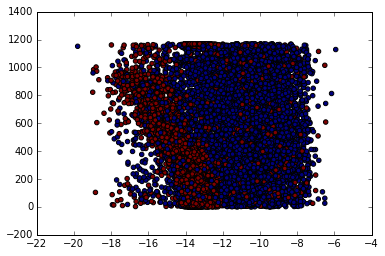

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_train.log_energy_deposit,
            X_train.relative_time,
            c=y_train)


# Здравствуй, дерево

У дерева классификации (DecisionTreeClassifier) есть несколько параметров:
* criterion : как выбирать лучший признак - 'gini' или 'entropy' (по умолчанию gini).
* max_depth :  максимальная глубина дерева (по умолчанию - не ограничено)
* min_samples_split : минимальное количество примеров, которые можно делить дальше (по умолчанию 2)
* min_samples_leaf : минимальное количество примеров в листе (по умолчанию 1).

Сейчас все параметры установлены по умолчанию, но скоро это изменится

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Нарисуем цветом то, что мы выучили
* Дальше следует большая-толстая функция, которая по сути вызывает дерево решений в каждой точке и рисует это на графике. Она сильно оптимизирована, поэтому трудночитаема - пока в неё можно просто поверить.

In [5]:
from sklearn.metrics import accuracy_score
def plot_decision_surface(clf,X,y,
                          plot_step = 0.2,
                          figsize=(12,8)
                         ):
    # Plot the decision boundary
    plt.figure(figsize=figsize)
    X = np.array(X)
    
    n_classes = len(set(y))
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z,alpha=0.5)    
    y_pred = clf.predict(X)

    # Plot the training points
    plt.scatter(*X[y_pred==y].T,c = y[y_pred==y],
                marker='.',alpha=0.3,label='correct')
    plt.scatter(*X[y_pred!=y].T,c = y[y_pred!=y],
                marker='x',s=50,label='errors')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis("tight")
    plt.legend(loc='best')
    print "Accuracy = ",accuracy_score(y,y_pred)


### Качество на обучающей выборке

Accuracy =  1.0


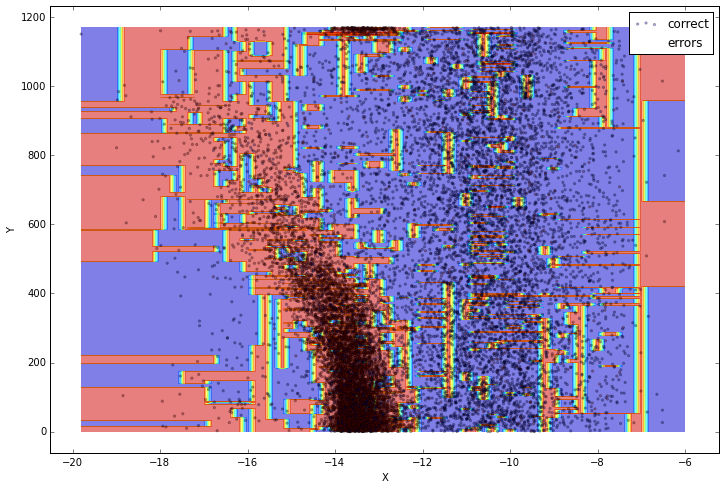

In [6]:
plot_decision_surface(tree,X_train,y_train)


### Качество на тесте

Accuracy =  0.765338887443


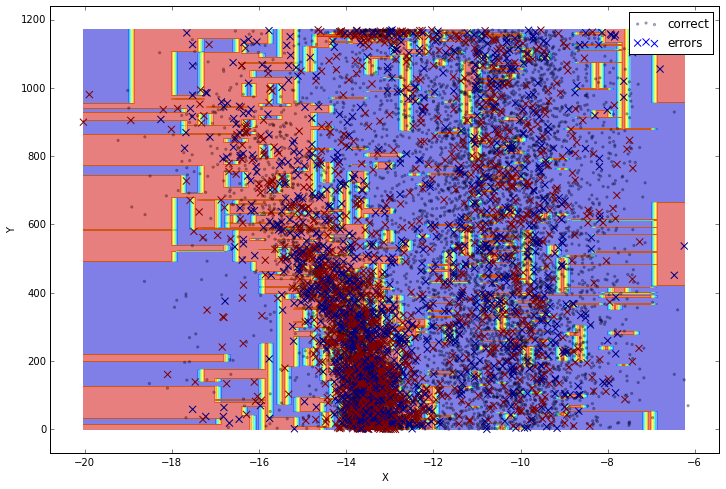

In [7]:
plot_decision_surface(tree,X_test,y_test)

### Чини его полностью!

Попробуйте поменять параметры DecisionTreeClassifier, чтобы точность стала лучше.
 * Accuracy >= 0.77 - неплохой первый шаг
 * Accuracy >= 0.8 - уже лучше, но можно ещё поднажать
 * Accuracy >= 0.83 - вполне неплохо
 * Accuracy >= 0.85  - или офигенно или очень повезло
 
[чтобы не мучиться, можно не переписывать всё, а исправлять код выше]

### Многомерные задачи

* Решать задачи на двух измерениях мы можем и без помощи машин - а вот с большим числом размерностей у человека начинаются проблемы.
* В данной задаче есть дополнительные признаки, которые 

In [8]:
import pickle
with open("data.pcl") as fout:
    X_train,X_test,y_train,y_test = pickle.load(fout)

X_train[:3]

,log_energy_deposit,relative_time,wire_rho,wire_phi
global_id,,,,
133,-10.450475,652.571258,53.0,4.220523
172,-8.320533,275.635012,53.0,5.458121
726,-11.808167,732.434919,57.8,3.316126


### Дерево на многомерных данных
* Теперь мы ищем закономерность в четырёхмерном пространстве
* __Ваша задача__ - как и прежде, настроить решающее дерево, чтобы добиться точности хотя бы __85%__.

In [9]:
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [10]:
print "Train accuracy:",accuracy_score(y_train,tree.predict(X_train))
print "Test accuracy:",accuracy_score(y_test,tree.predict(X_test))

Train accuracy: 0.934785261103
Test accuracy: 0.816801180248


## Дополнительные признаки

* В машинном обучении очень многое зависит от признаков, которыми может пользоваться алгоритм. Полезные признаки увеличивают точность, шум и бесполезные признаки могут её ухудшить.
* Вам предлагается придумать дополнительные признаки для многомерной задачи выше.

Например, вот так можно добавить признак "расстояние от центра делить на время срабатывания", что бы он не значил.
```
X_train["rho_over_time"] = X_train["wire_rho"] / (X_train["relative_time"]+1e-4)
X_test["rho_over_time"] = X_test["wire_rho"] / (X_test["relative_time"]+1e-4)
```
_1e-4 добавлено, чтобы избежать деления на 0_

### Grid search

__Бонусный квест -__ найти оптимальные параметры классификатора поиском по сетке.
Можно написать скрипт, который будет самостоятельно перебирать наборы параметров и выбирать те, у которых в итоге лучше точность.

In [ ]:
<your code here>

final_model = <your_code>

In [ ]:
plot_decision_surface(final_model,Xts,Yts)

### Всё ещё переобучаемся

Дерево классификации строится так, чтобы лучше __подогнаться__ под __обучающую выборку__.
Сейчас __вы подгоняете__ параметры модели так, чтобы качество на __тестовой выборке__ было наибольшим.
По сути, вы больше не можете считать, что качество на тесте - хорошая оценка реального качества, потому, что вы подгоняетесь под эту выборку.

Как с этим бороться?
```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

Например, можно выделить ещё одну "совсем тестовую" выборку, положить её под камень и не использовать при выборе гиперпараметров -- и оцениваться на ней только 1 раз, когда вы уже определились с моделью.